In [1]:
### Network Slicing Recognition

The telecom industry is going through a massive digital transformation with the adoption of ML, AI, feedback-based automation and advanced analytics to handle the next generation applications and services. AI concepts are not new; the algorithms used by Machine Learning and Deep Learning are being currently implemented in various industries and technology verticals. With growing data and immense volume <br>

of information over 5G, the ability to predict data proactively, swiftly and with accuracy, is critically important. Data-driven decision making will be vital in future communication networks due to the traffic explosion and Artificial Intelligence (AI) will accelerate the 5G network performance. <br>

Mobile operators are looking for a programmable solution that will allow them to accommodate multiple independent tenants on the same physical infrastructure and 5G networks allow for end-to-end network resource allocation using the concept of Network Slicing (NS). <br>

Network Slicing will play a vital role in enabling a multitude of 5G applications, use cases, and services. Network slicing functions will provide an end-to-end isolation between slices with an ability to customize each slice based on the service demands (bandwidth, coverage, security, latency, reliability, etc). <br>

Your Task is to build a Machine Learning model that will be able to to proactively detect and eliminate threats based on incoming connections thereby selecting the most appropriate network slice, even in case of a network failure. <br>

**LTE/5g** - User Equipment categories or classes to define the performance specifications <br>
**Packet Loss Rate** - number of packets not received divided by the total number of packets sent. <br>
**Packet Delay** - The time for a packet to be received. <br>
**Slice type** - network configuration that allows multiple networks (virtualized and independent) <br>
**GBR** - Guaranteed Bit Rate <br>
**Healthcare** - Usage in Healthcare (1 or 0) <br>
**Industry 4.0** - Usage in Digital Enterprises(1 or 0) <br>
**IoT Devices** - Usage <br>
**Public Safety** - Usage for public welfare and safety purposes (1 or 0) <br>
**Smart City & Home** - usage in daily household chores <br>
**Smart Transportation** - usage in public transportation <br>
**Smartphone** - whether used for smartphone cellular data <br>

In [ ]:
###! pip install neattext

In [3]:
import pandas as pd
import numpy as np
import neattext.functions as nfx
import seaborn as sn

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity,linear_kernel

In [ ]:
###! pip uninstall numpy
##!pip install numpy==1.20

In [5]:
###!mkdir ~/.kaggle

In [ ]:
###!cp /kaggle.json ~/.kaggle/

In [ ]:
##! pip install kaggle
##!pip install keras-tuner

In [ ]:
###!kaggle datasets download -d gauravduttakiit/network-slicing-recognition

In [ ]:
###!unzip /content/network-slicing-recognition.zip

In [10]:
train_dataset = pd.read_csv("/content/train_dataset.csv")
test_dataset = pd.read_csv("/content/test_dataset.csv")

In [11]:
print(train_dataset.shape, test_dataset.shape)

(31583, 17) (31584, 16)


In [12]:
test_dataset['slice Type'] = 0

In [13]:
train_dataset = train_dataset.reset_index()
test_dataset = test_dataset.reset_index()
train_dataset.rename(columns = { "index" : "ID"}, inplace = True)
test_dataset.rename(columns = { "index" : "ID"}, inplace = True)

In [14]:
train_dataset.columns

Index(['ID', 'LTE/5g Category', 'Time', 'Packet Loss Rate', 'Packet delay',
       'IoT', 'LTE/5G', 'GBR', 'Non-GBR', 'AR/VR/Gaming', 'Healthcare',
       'Industry 4.0', 'IoT Devices', 'Public Safety', 'Smart City & Home',
       'Smart Transportation', 'Smartphone', 'slice Type'],
      dtype='object')

In [15]:
train_dataset.shape

(31583, 18)

In [16]:
train_dataset['slice Type'].value_counts()

1    16799
3     7392
2     7392
Name: slice Type, dtype: int64

In [17]:
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles

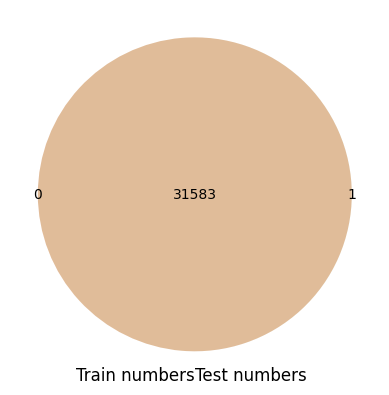

In [18]:
set_numbers_train = set(train_dataset[['ID']].drop_duplicates().sort_values(by = 'ID')['ID'].tolist())
set_numbers_test = set(test_dataset[['ID']].drop_duplicates().sort_values(by = 'ID')['ID'].tolist())
venn2((set_numbers_train, set_numbers_test), set_labels = ('Train numbers', 'Test numbers'))

In [19]:
train_dataset.columns

Index(['ID', 'LTE/5g Category', 'Time', 'Packet Loss Rate', 'Packet delay',
       'IoT', 'LTE/5G', 'GBR', 'Non-GBR', 'AR/VR/Gaming', 'Healthcare',
       'Industry 4.0', 'IoT Devices', 'Public Safety', 'Smart City & Home',
       'Smart Transportation', 'Smartphone', 'slice Type'],
      dtype='object')

In [ ]:
####! pip install klib

In [22]:
import klib

In [23]:
train_dataset = klib.clean_column_names(train_dataset)
test_dataset = klib.clean_column_names(test_dataset)

In [24]:
train_dataset = klib.convert_datatypes(train_dataset)
test_dataset = klib.convert_datatypes(test_dataset)

In [25]:
train_dataset.columns

Index(['id', 'lte_5g_category', 'time', 'packet_loss_rate', 'packet_delay',
       'io_t', 'lte_5g', 'gbr', 'non_gbr', 'ar_vr_gaming', 'healthcare',
       'industry_4_0', 'io_t_devices', 'public_safety', 'smart_city_and_home',
       'smart_transportation', 'smartphone', 'slice_type'],
      dtype='object')

### Anomaly Detection Using One-Class SVM


In [26]:
from sklearn import svm

In [27]:
clf = svm.OneClassSVM(nu=0.05, kernel="rbf", gamma=0.1)
clf.fit(train_dataset)

OneClassSVM(gamma=0.1, nu=0.05)

In [28]:
pred = clf.predict(train_dataset)

# inliers are labeled 1, outliers are labeled -1
normal = train_dataset[pred == 1]
abnormal = train_dataset[pred == -1]

In [29]:
print(normal.shape, abnormal.shape)

(18373, 18) (13210, 18)


In [30]:
normal.columns

Index(['id', 'lte_5g_category', 'time', 'packet_loss_rate', 'packet_delay',
       'io_t', 'lte_5g', 'gbr', 'non_gbr', 'ar_vr_gaming', 'healthcare',
       'industry_4_0', 'io_t_devices', 'public_safety', 'smart_city_and_home',
       'smart_transportation', 'smartphone', 'slice_type'],
      dtype='object')

In [31]:
train_dataset = normal

In [32]:
print(train_dataset.shape)
print(train_dataset.columns)

(18373, 18)
Index(['id', 'lte_5g_category', 'time', 'packet_loss_rate', 'packet_delay',
       'io_t', 'lte_5g', 'gbr', 'non_gbr', 'ar_vr_gaming', 'healthcare',
       'industry_4_0', 'io_t_devices', 'public_safety', 'smart_city_and_home',
       'smart_transportation', 'smartphone', 'slice_type'],
      dtype='object')


In [33]:
test_dataset['slice_type'] = 0

In [34]:
klib.cat_plot(train_dataset)

No columns with categorical data were detected.


In [35]:
klib.corr_interactive_plot(train_dataset)

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<Axes: xlabel='id', ylabel='Density'>

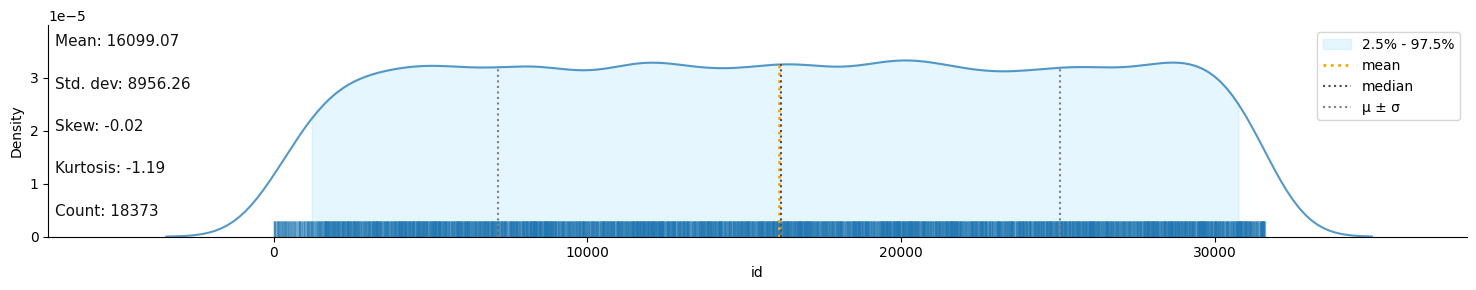

In [36]:
klib.dist_plot(train_dataset)

In [37]:
klib.missingval_plot(train_dataset)

No missing values found in the dataset.


In [38]:
klib.corr_mat(train_dataset)

,id,lte_5g_category,time,packet_loss_rate,packet_delay,io_t,lte_5g,gbr,non_gbr,ar_vr_gaming,healthcare,industry_4_0,io_t_devices,public_safety,smart_city_and_home,smart_transportation,smartphone,slice_type
id,1.00,-0.02,-0.00,0.02,0.01,0.00,-0.00,0.00,-0.00,-0.01,-0.01,-0.01,0.00,0.00,0.01,-0.00,0.00,-0.00
lte_5g_category,-0.02,1.00,-0.01,0.02,-0.02,0.10,-0.10,-0.01,0.01,-0.03,0.02,0.05,0.02,0.02,0.05,0.02,-0.08,0.08
time,-0.00,-0.01,1.00,0.01,-0.01,0.00,-0.00,-0.01,0.01,-0.00,-0.01,0.00,-0.00,0.00,0.01,-0.00,0.00,-0.00
packet_loss_rate,0.02,0.02,0.01,1.00,0.31,0.17,-0.17,-0.02,0.02,-0.17,-0.17,-0.22,0.39,-0.18,0.58,-0.18,-0.07,-0.10
packet_delay,0.01,-0.02,-0.01,0.31,1.00,-0.19,0.19,0.42,-0.42,-0.13,-0.24,-0.28,0.44,-0.25,0.20,-0.24,0.27,-0.39
io_t,0.00,0.10,0.00,0.17,-0.19,1.00,-1.00,-0.12,0.12,-0.32,0.26,0.39,0.27,0.27,0.39,0.26,-0.81,0.91
lte_5g,-0.00,-0.10,-0.00,-0.17,0.19,-1.00,1.00,0.12,-0.12,0.32,-0.26,-0.39,-0.27,-0.27,-0.39,-0.26,0.81,-0.91
gbr,0.00,-0.01,-0.01,-0.02,0.42,-0.12,0.12,1.00,-1.00,0.04,-0.21,0.05,0.28,-0.22,0.04,-0.22,0.10,-0.32
non_gbr,-0.00,0.01,0.01,0.02,-0.42,0.12,-0.12,-1.00,1.00,-0.04,0.21,-0.05,-0.28,0.22,-0.04,0.22,-0.10,0.32
ar_vr_gaming,-0.01,-0.03,-0.00,-0.17,-0.13,-0.32,0.32,0.04,-0.04,1.00,-0.08,-0.12,-0.09,-0.09,-0.13,-0.08,-0.30,-0.29


In [39]:
train_dataset.columns

Index(['id', 'lte_5g_category', 'time', 'packet_loss_rate', 'packet_delay',
       'io_t', 'lte_5g', 'gbr', 'non_gbr', 'ar_vr_gaming', 'healthcare',
       'industry_4_0', 'io_t_devices', 'public_safety', 'smart_city_and_home',
       'smart_transportation', 'smartphone', 'slice_type'],
      dtype='object')

In [40]:
# Checking for outliers in the continuous variables
num_train_dataset = train_dataset[['id', 'lte_5g_category', 'time', 'packet_loss_rate', 'packet_delay',
       'io_t', 'lte_5g', 'gbr', 'non_gbr', 'ar_vr_gaming', 'healthcare',
       'industry_4_0', 'io_t_devices', 'public_safety', 'smart_city_and_home',
       'smart_transportation', 'smartphone', 'slice_type']]


In [41]:
train_dataset['slice_type'].value_counts()

1    9839
2    4294
3    4240
Name: slice_type, dtype: int64

In [42]:
train_dataset.columns

Index(['id', 'lte_5g_category', 'time', 'packet_loss_rate', 'packet_delay',
       'io_t', 'lte_5g', 'gbr', 'non_gbr', 'ar_vr_gaming', 'healthcare',
       'industry_4_0', 'io_t_devices', 'public_safety', 'smart_city_and_home',
       'smart_transportation', 'smartphone', 'slice_type'],
      dtype='object')

In [43]:
y_train = train_dataset['slice_type']
x_train = train_dataset.drop('slice_type', axis = 1)
y_test = test_dataset['slice_type']
x_test = test_dataset.drop('slice_type', axis = 1)

In [44]:
from sklearn.ensemble import ExtraTreesClassifier
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,
                                        criterion ='entropy', max_features = 2)
extra_tree_forest.fit(x_train, y_train)
feature_importance = extra_tree_forest.feature_importances_
feature_importance_normalized = np.std([tree.feature_importances_ for tree in
                                        extra_tree_forest.estimators_],
                                        axis = 0)

In [45]:
import matplotlib.pyplot as plt

In [46]:
feature_importance_normalized

array([0.00000000e+00, 0.00000000e+00, 1.72660354e-05, 8.70177097e-02,
       1.85906606e-01, 1.75026484e-01, 2.50351600e-01, 7.80310584e-02,
       8.50223699e-02, 8.97766063e-02, 0.00000000e+00, 2.20555329e-02,
       0.00000000e+00, 2.62057558e-02, 6.46563362e-02, 2.96450142e-02,
       1.34951710e-01])

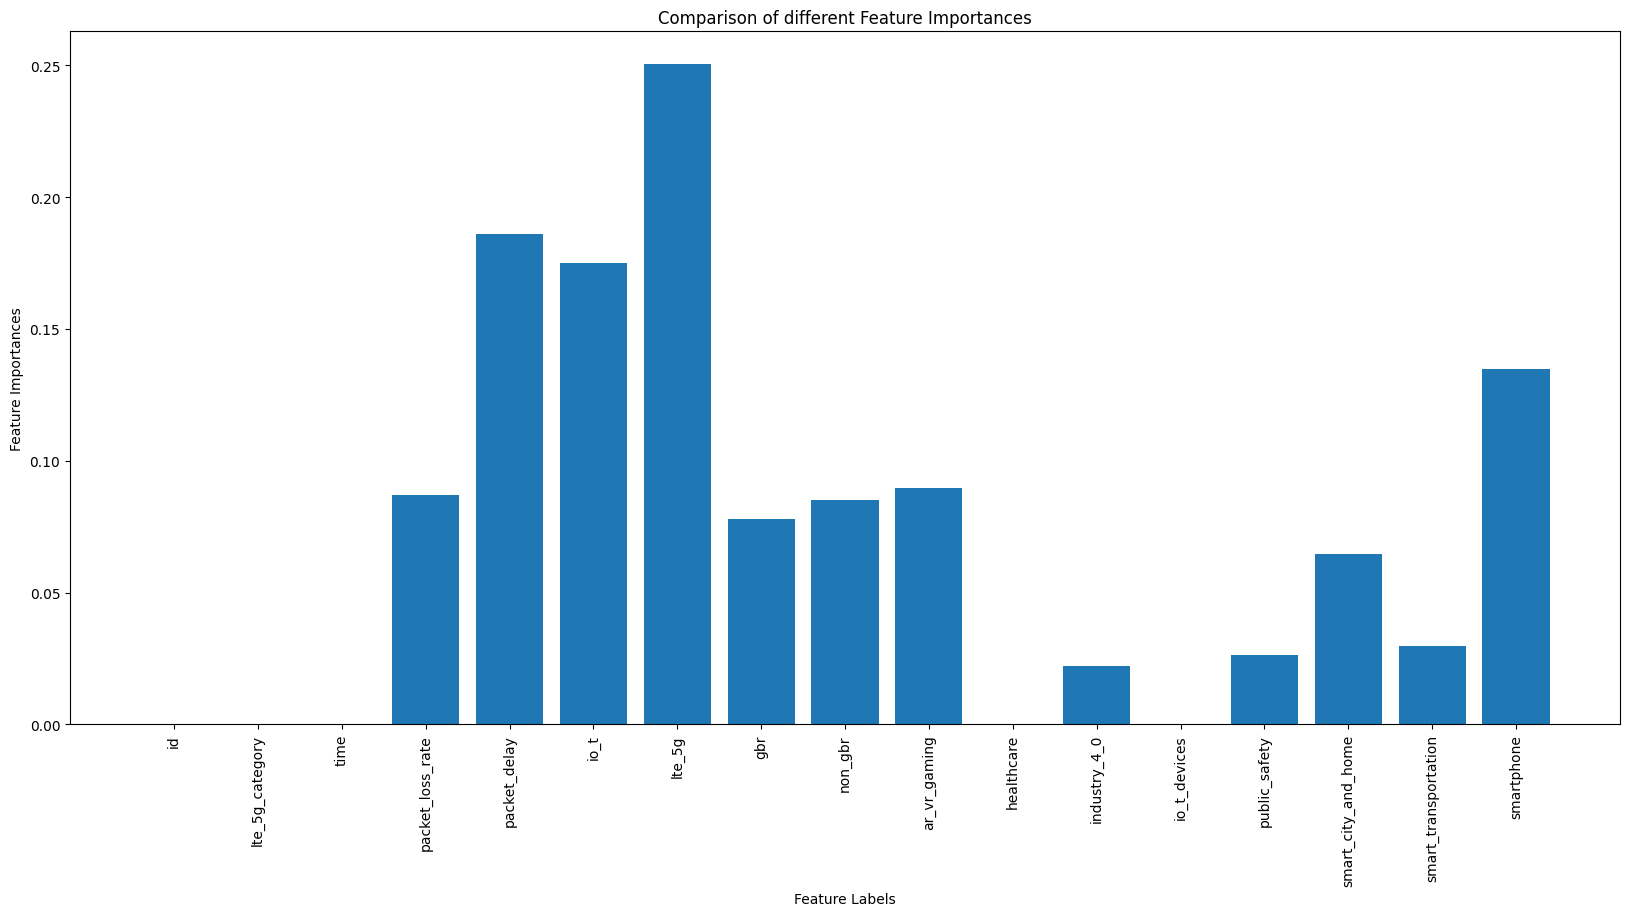

In [47]:
plt.figure(figsize = [20,9])
plt.bar(x_train.columns, feature_importance_normalized)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.xticks(rotation = 90)
plt.title('Comparison of different Feature Importances')
plt.show()

In [48]:
x_train.columns

Index(['id', 'lte_5g_category', 'time', 'packet_loss_rate', 'packet_delay',
       'io_t', 'lte_5g', 'gbr', 'non_gbr', 'ar_vr_gaming', 'healthcare',
       'industry_4_0', 'io_t_devices', 'public_safety', 'smart_city_and_home',
       'smart_transportation', 'smartphone'],
      dtype='object')

In [51]:
x_train2 = x_train[['lte_5g_category', 'packet_loss_rate', 'packet_delay',
       'io_t', 'lte_5g', 'gbr', 'non_gbr', 'ar_vr_gaming', 'healthcare',
       'industry_4_0', 'io_t_devices', 'public_safety', 'smart_city_and_home',
       'smart_transportation', 'smartphone']]

In [52]:
x_test2 = x_test[['lte_5g_category', 'packet_loss_rate', 'packet_delay',
       'io_t', 'lte_5g', 'gbr', 'non_gbr', 'ar_vr_gaming', 'healthcare',
       'industry_4_0', 'io_t_devices', 'public_safety', 'smart_city_and_home',
       'smart_transportation', 'smartphone']]

In [53]:
print(x_train2.shape, x_test2.shape)

(18373, 15) (31584, 15)


In [54]:
y_train.value_counts()

1    9839
2    4294
3    4240
Name: slice_type, dtype: int64

In [55]:
x_train2 = pd.DataFrame(x_train2)

In [56]:
x_train2.head(4)

,lte_5g_category,packet_loss_rate,packet_delay,io_t,lte_5g,gbr,non_gbr,ar_vr_gaming,healthcare,industry_4_0,io_t_devices,public_safety,smart_city_and_home,smart_transportation,smartphone
0,14,0.000001,10,1,0,0,1,0,0,0,0,1,0,0,0
4,9,0.010000,50,1,0,0,1,0,0,0,0,0,1,0,0
5,19,0.000001,10,1,0,0,1,0,0,1,0,0,0,0,0
8,8,0.001000,150,0,1,0,1,0,0,0,0,0,0,0,1


In [57]:
x_train2 = pd.DataFrame(x_train2)
x_test2 = pd.DataFrame(x_test2)

In [58]:
x_train2.astype(float).corr()

,lte_5g_category,packet_loss_rate,packet_delay,io_t,lte_5g,gbr,non_gbr,ar_vr_gaming,healthcare,industry_4_0,io_t_devices,public_safety,smart_city_and_home,smart_transportation,smartphone
lte_5g_category,1.000000,0.022254,-0.015085,0.095605,-0.095605,-0.007156,0.007156,-0.034010,0.018408,0.045106,0.019458,0.019485,0.047347,0.019787,-0.075152
packet_loss_rate,0.022254,1.000000,0.306436,0.170858,-0.170858,-0.022315,0.022315,-0.168172,-0.174050,-0.216202,0.389878,-0.182358,0.578743,-0.176111,-0.067416
packet_delay,-0.015085,0.306436,1.000000,-0.187910,0.187910,0.424124,-0.424124,-0.127614,-0.238384,-0.284384,0.437355,-0.249763,0.200818,-0.241206,0.268831
io_t,0.095605,0.170858,-0.187910,1.000000,-1.000000,-0.122402,0.122402,-0.321284,0.260863,0.385515,0.265817,0.273314,0.394585,0.263951,-0.807524
lte_5g,-0.095605,-0.170858,0.187910,-1.000000,1.000000,0.122402,-0.122402,0.321284,-0.260863,-0.385515,-0.265817,-0.273314,-0.394585,-0.263951,0.807524
gbr,-0.007156,-0.022315,0.424124,-0.122402,0.122402,1.000000,-1.000000,0.037476,-0.213782,0.045353,0.281337,-0.223986,0.035940,-0.216313,0.099995
non_gbr,0.007156,0.022315,-0.424124,0.122402,-0.122402,-1.000000,1.000000,-0.037476,0.213782,-0.045353,-0.281337,0.223986,-0.035940,0.216313,-0.099995
ar_vr_gaming,-0.034010,-0.168172,-0.127614,-0.321284,0.321284,0.037476,-0.037476,1.000000,-0.083811,-0.123860,-0.085403,-0.087812,-0.126774,-0.084803,-0.299119
healthcare,0.018408,-0.174050,-0.238384,0.260863,-0.260863,-0.213782,0.213782,-0.083811,1.000000,-0.087228,-0.060145,-0.061841,-0.089280,-0.059722,-0.210653
industry_4_0,0.045106,-0.216202,-0.284384,0.385515,-0.385515,0.045353,-0.045353,-0.123860,-0.087228,1.000000,-0.088885,-0.091391,-0.131942,-0.088261,-0.311313


In [59]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

    print(dataset.columns)
    print(dataset.shape)

In [60]:
correlation(x_train2, 0.95)

Index(['lte_5g_category', 'packet_loss_rate', 'packet_delay', 'io_t', 'lte_5g',
       'gbr', 'non_gbr', 'ar_vr_gaming', 'healthcare', 'industry_4_0',
       'io_t_devices', 'public_safety', 'smart_city_and_home',
       'smart_transportation', 'smartphone'],
      dtype='object')
(18373, 15)


In [61]:
print(x_train2.columns, x_train2.shape)
print(x_test2.columns, x_test2.shape)


Index(['lte_5g_category', 'packet_loss_rate', 'packet_delay', 'io_t', 'lte_5g',
       'gbr', 'non_gbr', 'ar_vr_gaming', 'healthcare', 'industry_4_0',
       'io_t_devices', 'public_safety', 'smart_city_and_home',
       'smart_transportation', 'smartphone'],
      dtype='object') (18373, 15)
Index(['lte_5g_category', 'packet_loss_rate', 'packet_delay', 'io_t', 'lte_5g',
       'gbr', 'non_gbr', 'ar_vr_gaming', 'healthcare', 'industry_4_0',
       'io_t_devices', 'public_safety', 'smart_city_and_home',
       'smart_transportation', 'smartphone'],
      dtype='object') (31584, 15)


### Standard Scaler

In [62]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train2=pd.DataFrame(scaler.fit_transform(x_train2),columns=x_train2.columns)
x_train2.head()

,lte_5g_category,packet_loss_rate,packet_delay,io_t,lte_5g,gbr,non_gbr,ar_vr_gaming,healthcare,industry_4_0,io_t_devices,public_safety,smart_city_and_home,smart_transportation,smartphone
0,0.496569,-0.716409,-0.981216,1.073740,-1.073740,-0.87995,0.87995,-0.344976,-0.242948,-0.359040,-0.247562,3.928589,-0.367487,-0.245824,-0.867071
1,-0.319527,1.574868,-0.602200,1.073740,-1.073740,-0.87995,0.87995,-0.344976,-0.242948,-0.359040,-0.247562,-0.254544,2.721185,-0.245824,-0.867071
2,1.312664,-0.716409,-0.981216,1.073740,-1.073740,-0.87995,0.87995,-0.344976,-0.242948,2.785209,-0.247562,-0.254544,-0.367487,-0.245824,-0.867071
3,-0.482746,-0.487488,0.345339,-0.931324,0.931324,-0.87995,0.87995,-0.344976,-0.242948,-0.359040,-0.247562,-0.254544,-0.367487,-0.245824,1.153308
4,-0.645965,-0.716409,-0.981216,1.073740,-1.073740,-0.87995,0.87995,-0.344976,4.116113,-0.359040,-0.247562,-0.254544,-0.367487,-0.245824,-0.867071


In [63]:
x_test2=pd.DataFrame(scaler.fit_transform(x_test2),columns=x_test2.columns)
x_test2.head()

,lte_5g_category,packet_loss_rate,packet_delay,io_t,lte_5g,gbr,non_gbr,ar_vr_gaming,healthcare,industry_4_0,io_t_devices,public_safety,smart_city_and_home,smart_transportation,smartphone
0,0.664781,-0.482940,-0.136290,-0.938083,0.938083,1.124027,-1.124027,2.896828,-0.25058,-0.365662,-0.250722,-0.246559,-0.362819,-0.248791,-0.860496
1,0.500168,-0.712444,-0.982767,1.066004,-1.066004,-0.889658,0.889658,-0.345205,-0.25058,-0.365662,-0.250722,-0.246559,-0.362819,4.019440,-0.860496
2,0.006327,-0.482940,-0.606555,1.066004,-1.066004,1.124027,-1.124027,-0.345205,-0.25058,2.734762,-0.250722,-0.246559,-0.362819,-0.248791,-0.860496
3,1.487848,-0.482940,-0.606555,1.066004,-1.066004,1.124027,-1.124027,-0.345205,-0.25058,2.734762,-0.250722,-0.246559,-0.362819,-0.248791,-0.860496
4,-1.475194,-0.482940,-0.606555,-0.938083,0.938083,-0.889658,0.889658,2.896828,-0.25058,-0.365662,-0.250722,-0.246559,-0.362819,-0.248791,-0.860496


In [64]:
print(x_train2.shape, x_test2.shape)

(18373, 15) (31584, 15)


In [65]:
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [66]:
y_train.columns

Index(['slice_type'], dtype='object')

In [67]:
y_train = pd.get_dummies(y_train.slice_type)
y_test = pd.get_dummies(y_test.slice_type)


In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Embedding, Dense
from keras import callbacks

In [69]:
#Early stopping
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)


In [70]:
from keras.optimizers import Adam

In [72]:
# Initialising the NN
model = Sequential()

# layers

model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 15))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 3, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
opt = Adam(learning_rate=0.00009)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])


In [73]:
history = model.fit(x_train2, y_train, batch_size = 64, epochs = 150, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/150
230/230 [==============================] - 2s 2ms/step - loss: 0.6899 - accuracy: 0.5350 - val_loss: 0.6815 - val_accuracy: 0.5331
Epoch 2/150
230/230 [==============================] - 0s 2ms/step - loss: 0.5794 - accuracy: 0.5361 - val_loss: 0.4108 - val_accuracy: 0.5331
Epoch 3/150
230/230 [==============================] - 0s 2ms/step - loss: 0.3691 - accuracy: 0.5641 - val_loss: 0.3269 - val_accuracy: 0.7725
Epoch 4/150
230/230 [==============================] - 0s 2ms/step - loss: 0.3323 - accuracy: 0.7210 - val_loss: 0.3159 - val_accuracy: 0.7725
Epoch 5/150
230/230 [==============================] - 1s 3ms/step - loss: 0.3165 - accuracy: 0.7633 - val_loss: 0.2987 - val_accuracy: 0.7725
Epoch 6/150
230/230 [==============================] - 1s 3ms/step - loss: 0.2943 - accuracy: 0.7646 - val_loss: 0.2682 - val_accuracy: 0.7605
Epoch 7/150
230/230 [==============================] - 0s 2ms/step - loss: 0.2770 - accuracy: 0.7651 - val_loss: 0.2456 - val_accuracy: 0.7605

In [74]:
y_pred = model.predict(x_test2)

987/987 [==============================] - 1s 868us/step


In [75]:
y_pred = pd.DataFrame(y_pred)


In [76]:
new_y_pred = y_pred.idxmax(axis=1)

In [77]:
new_y_test = y_test.idxmax(axis=1)

In [78]:
new_y_pred = pd.DataFrame(new_y_pred)
new_y_test = pd.DataFrame(new_y_test)

In [79]:
new_y_pred.value_counts()

0    16800
1     7392
2     7392
dtype: int64

In [80]:
y_train = pd.DataFrame(y_train)

In [81]:
new_y_train= y_train.idxmax(axis=1)

In [82]:
new_y_train.value_counts()

1    9839
2    4294
3    4240
dtype: int64

In [83]:
new_y_pred = pd.DataFrame(new_y_pred)

In [84]:
new_y_pred.rename(columns = {0 : "Predict"}, inplace = True)

In [85]:
new_y_pred2 = new_y_pred

In [86]:
##
output = {
    0: '1',
    1: '2',
    2: '3'
}

In [87]:
new_y_pred["Predict"] = new_y_pred["Predict"].map(output)

In [88]:
new_y_pred.value_counts()

Predict
1          16800
2           7392
3           7392
dtype: int64

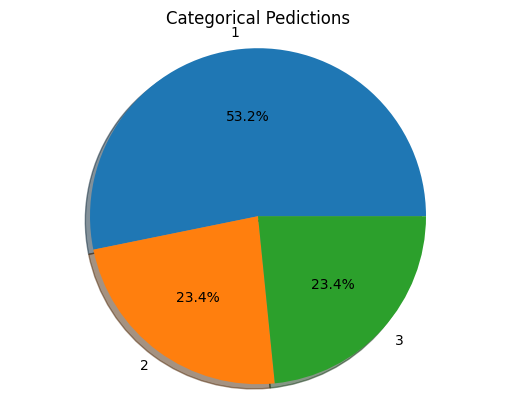

In [89]:
labels = new_y_pred['Predict'].astype('category').cat.categories.tolist()
counts = new_y_pred['Predict'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
plt.title("Categorical Pedictions")
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()


In [90]:
test_data_path = pd.read_csv("/content/test_dataset.csv")

In [91]:
print(test_data_path.shape, new_y_pred.shape)

(31584, 16) (31584, 1)


In [92]:
test_data_merged = pd.concat([test_data_path, new_y_pred], ignore_index=True, sort=False)

In [93]:
test_data_merged.columns

Index(['LTE/5g Category', 'Time', 'Packet Loss Rate', 'Packet delay', 'IoT',
       'LTE/5G', 'GBR', 'Non-GBR', 'AR/VR/Gaming', 'Healthcare',
       'Industry 4.0', 'IoT Devices', 'Public Safety', 'Smart City & Home',
       'Smart Transportation', 'Smartphone', 'Predict'],
      dtype='object')

In [94]:
test_data_merged.to_csv("/content/final.csv")